## Titanic survived Project

### Project Description

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


### Dataset Link-

https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv


In [1]:
# Import necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Dataset

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Checking The Dimension of th e dataset

df.shape

(891, 12)

Observation :

This Titanic Dataset contains 891 rows & 12 columns.

Here our objective is to predict survival using classification algorithim for that Here our target variable is 'Survived'.



### Exploratory Data Analysis (EDA)

In [4]:
# Data set information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As we can see there are  null values present in this dataset. 

This gives the brief about the dataset which includes indexing type,columns type, no null values and memory usage. 

There are three different types of data (int64 and float64, object) present in the dataset.

There are 5 features with object datatypes & rest are with numerical features.

In [5]:
# Any Duplicated values

df.duplicated().sum()

0

In [6]:
# Any missing values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

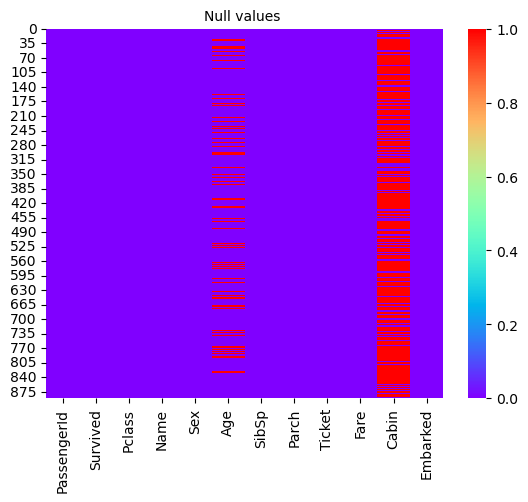

In [7]:
# Checking null value or missing data

plt.title('Null values ',fontsize=10)
sns.heatmap(df.isnull(),cmap="rainbow")
plt.show()

In [8]:
# Checking Missing Values and Percentage of Missing Data

missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

             Missing Values  % Missing data
Cabin                   687       77.104377
Age                     177       19.865320
Embarked                  2        0.224467
PassengerId               0        0.000000
Survived                  0        0.000000
Pclass                    0        0.000000
Name                      0        0.000000
Sex                       0        0.000000
SibSp                     0        0.000000
Parch                     0        0.000000
Ticket                    0        0.000000
Fare                      0        0.000000


Observation :

Dataset do not contain any duplicate values.

Feature'Age', 'Embarked', and 'Cabin' have null values.

19.86% of 'Age' data is null value,0.22% of 'Embarked' is null value, while 77.10% 'Cabin' data is null value.

Dropping 'Cabin' since 77.10% of its values is missing and therefore it cannot contribute to building a good model for 

predicting the target variable values.

In [9]:
# Statistical Summary

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Droping unnecessary column for further investigation

df=df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1,)

Sucessfuly removed the "PassengerId" and "Name" coulmns from our dataset that were logically not useful for predicting the survival of a person on the sinking ship.

I have removed the "Cabin" column since most of its data was missing and there was no point of filling around 80 percent data manually into a column. Either we need to get the data collected for missing values which is not possible in this scenario therefore dropping the column is the only course of action that seems fit to ensure that our best model predicts the label without any biasness.

### Dataframe after dropping PassengerID , Name,Cabin Column and Tcket.

In [11]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [12]:
# Data set information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


With the above information we see a variation in the data types for our columns present in the given dataset. There are 2 columns filled with float values, 4 columns have integer values and the remaining 2 columns have object data type. Since object data type cannot be used to build a machine learning model we will need to check if they have any inputs to provide and encode them for usage purpose.

In [13]:
# checking skew of data set

df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

Using the skew method we can see if there is any skewness in our dataset indicating any kind of outliers. Whether those outliers are genuine or will need to be treated before creating our machine learning model.

The acceptable range for skewness is +/-0.5. We can see that columns 'Survived' and 'Age' are the only one's within that range and for the rest of the columns will need to check for further information on them.

### Data Visualization

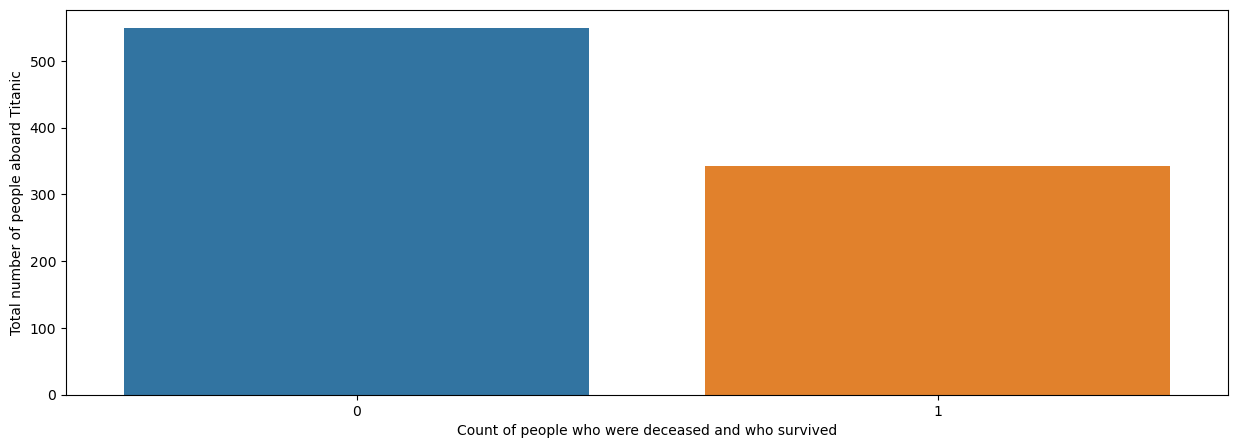

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(x ='Survived', data = df)
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

In the above count plot 0 depicts the number of people who drowned when the Titanic sank and 1 depicts the people who survived the sinking. We can see that more number of people drowned when the Titanic was sinking and one's who survived represent a lesser number in comparison.

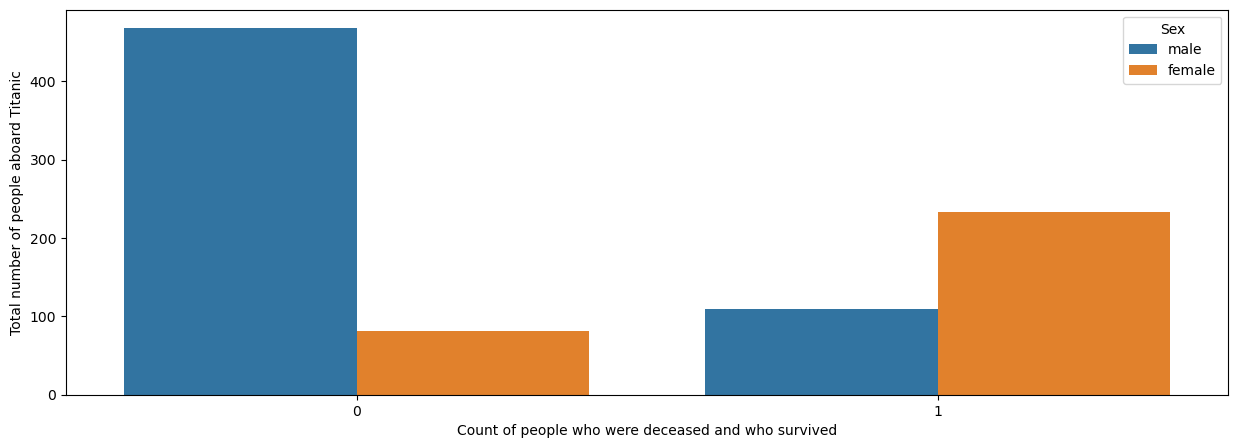

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(x ='Survived', data = df, hue='Sex')
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

Adding the sex column shows us a representation on how more men died when compared to women since in Titanic the rescue operations prioritized the life boat usage for women and children.

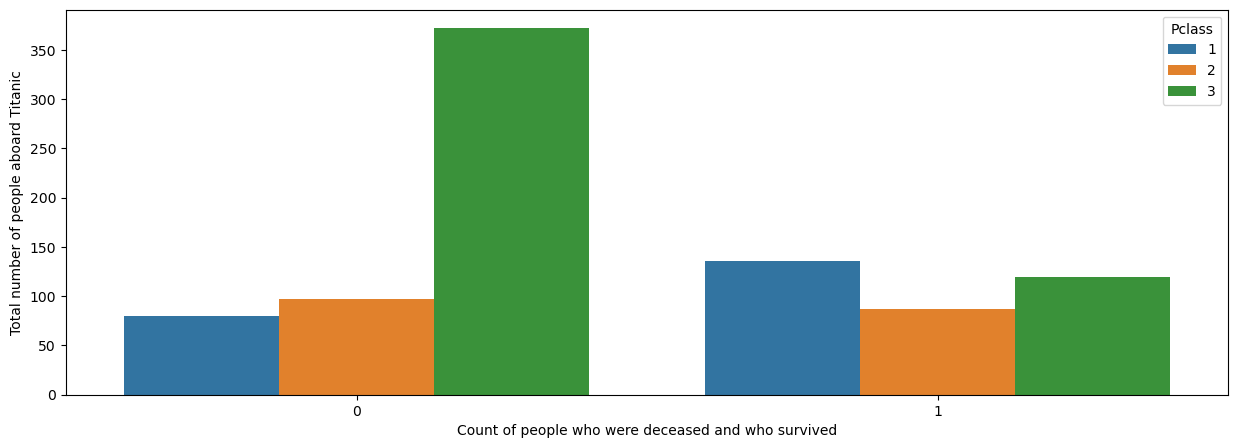

In [16]:
plt.figure(figsize=(15,5))
sns.countplot(x ='Survived', data = df, hue='Pclass')
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

Just like the Sex column when I tried checking for a visual representation over the passenger class factor I see that the highest number of deaths happened for class 3 people because again the rescue team gave priority based on class and passengers from class 1 were rescued first then class 2 and by the time class 3 folks were being rescued they ran out of life boats and time as well since the Titanic had almost sank into the ocean.

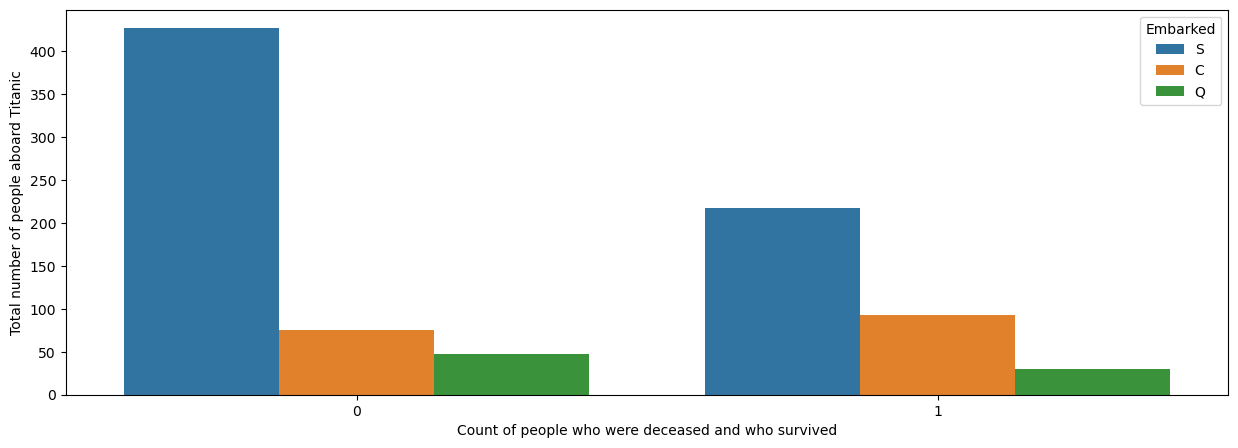

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(x ='Survived', data = df, hue='Embarked')
plt.xlabel('Count of people who were deceased and who survived')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

Taking a look at the embarked data it looks like the port where the passengers embarked the Titanic has very less to offer but definitely indicates that it still has inputs in terms of folks traveling from S=Southampton have died the most than they survived.

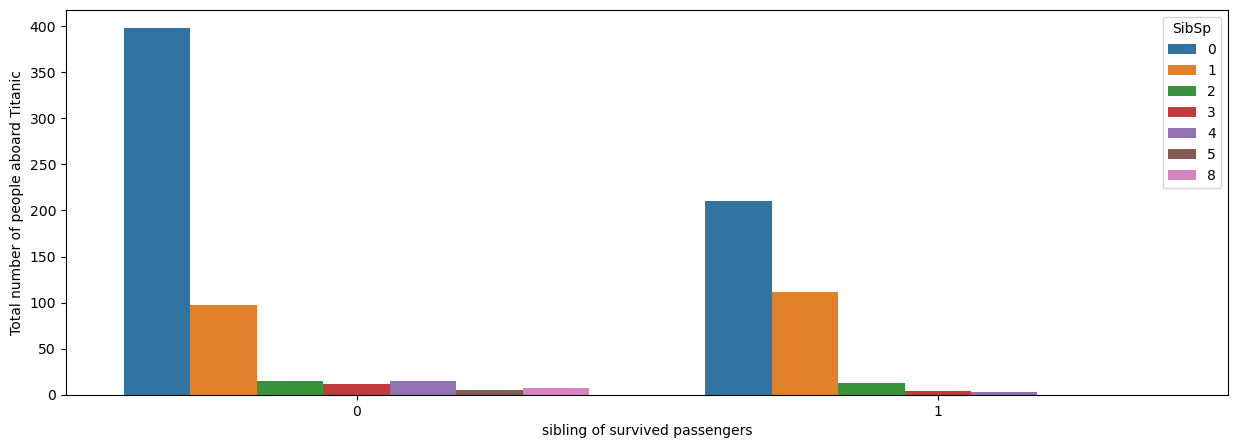

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(x ='Survived', data = df, hue='SibSp')
plt.xlabel('sibling of survived passengers')
plt.ylabel('Total number of people aboard Titanic')
plt.show()

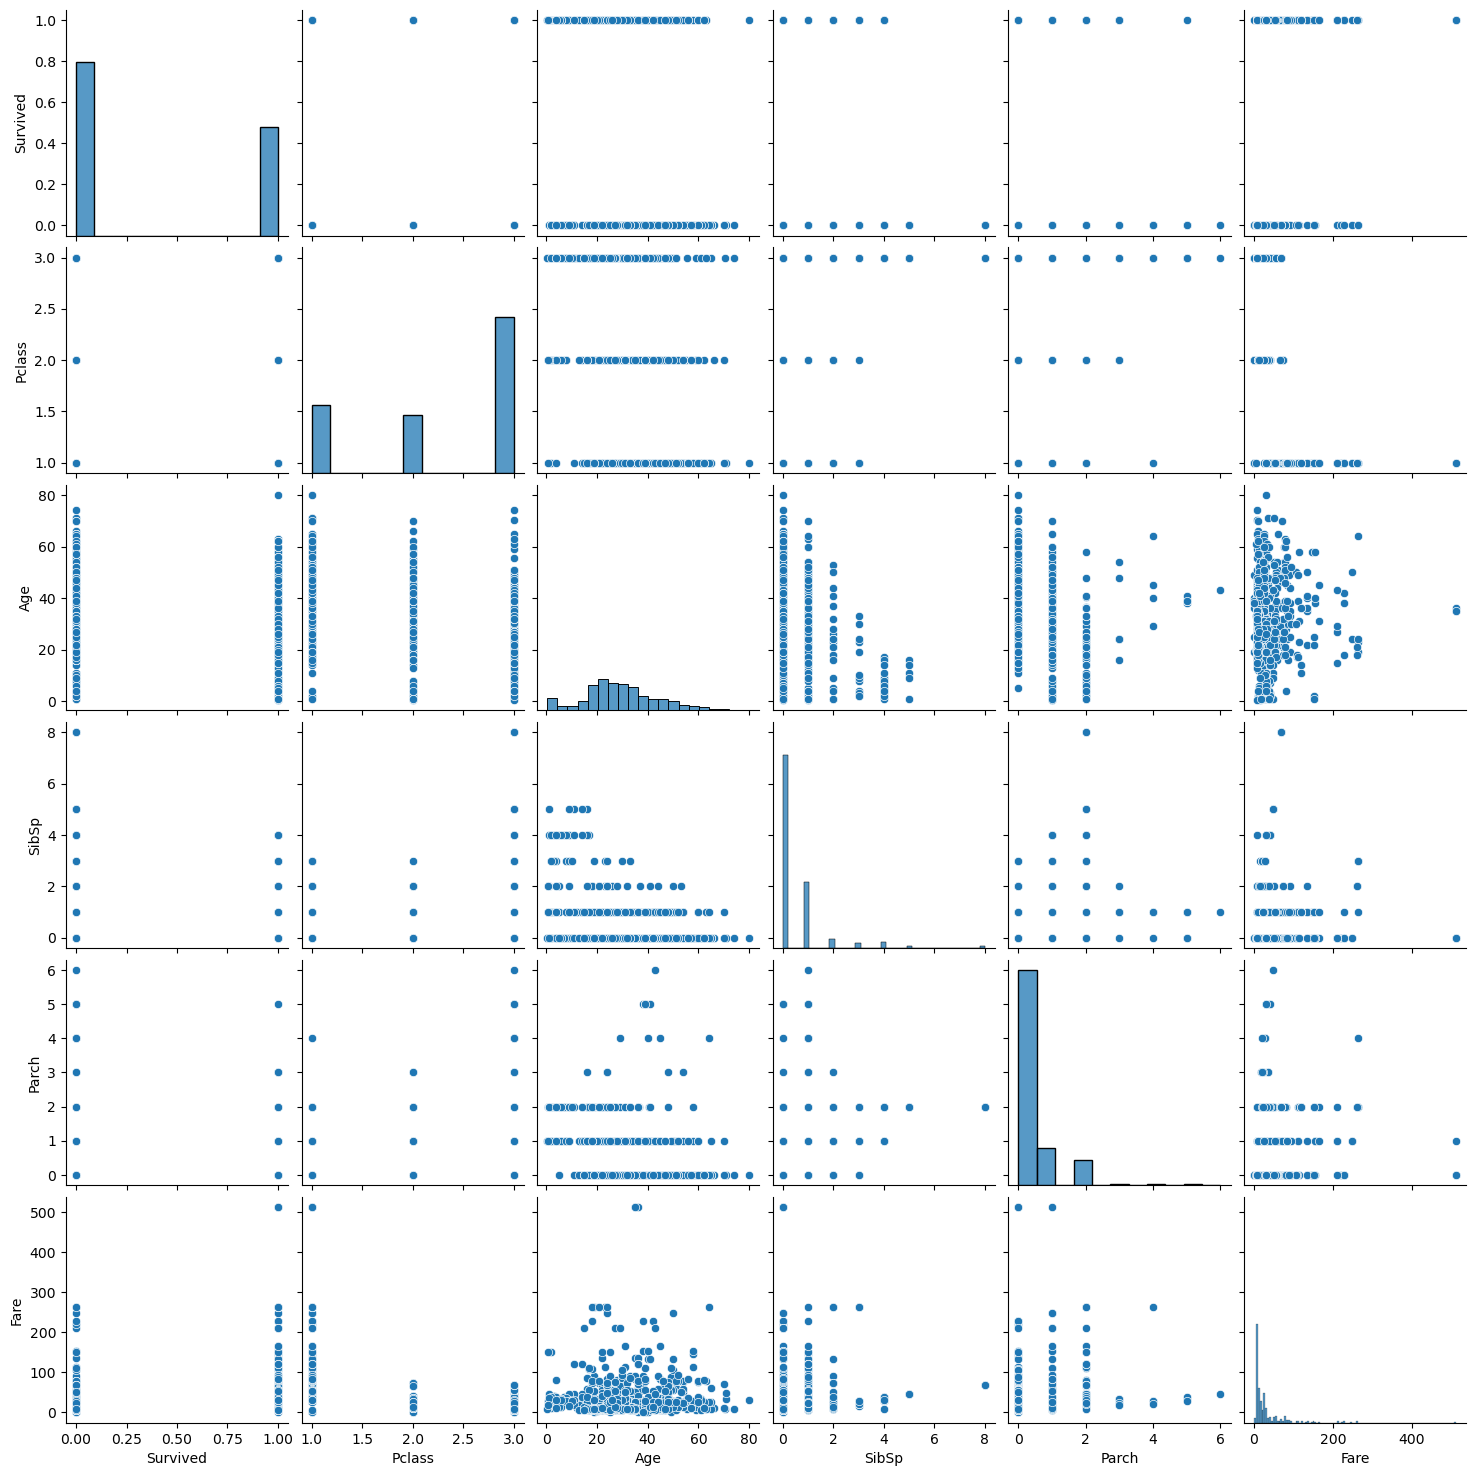

In [19]:
# Pair Plot

sns.pairplot(df)
plt.show()

The pairplot gives us a visualization on scatter plot + histogram showing us the outliers as well as the skewness data. Looking at the above picture we can see the presence of both skewness and outliers but we shall check few more visuals to confirm if those need to be treated or not.

###  Violin Plots

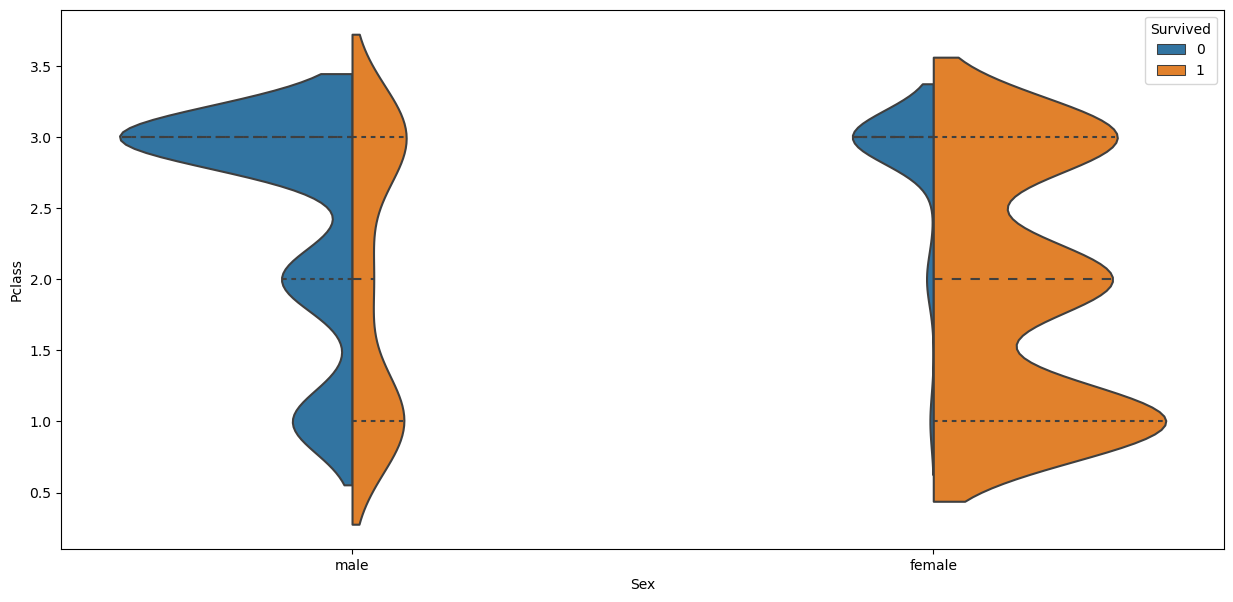

In [20]:
plt.figure(figsize=(15,7))
sns.violinplot(x="Sex", y="Pclass", hue="Survived", data=df, split=True, scale="count", inner="quartile")
plt.show()

In the above plot when comparing the gender with passenger class we see that the male who were in class 3 died in higher numbers as they were least prioritized.

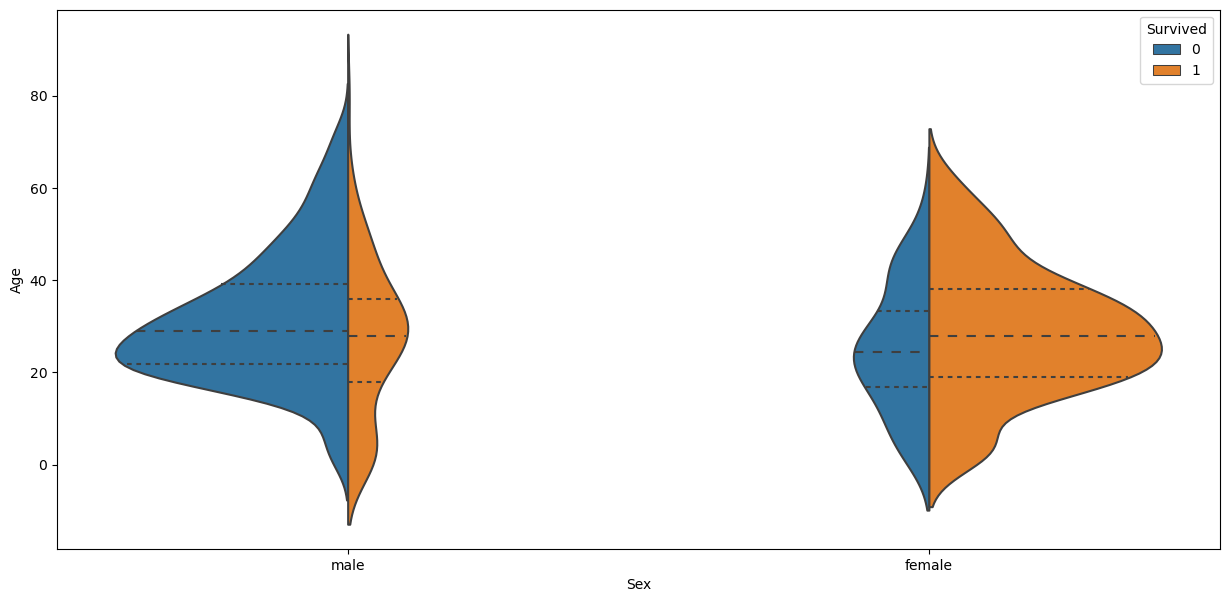

In [21]:
plt.figure(figsize=(15,7))
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, split=True, scale="count", inner="quartile")
plt.show()


The above figure depiction shows that the females who survived were averagely in their thirties similarly the males who drowned were averagely in their thirties.

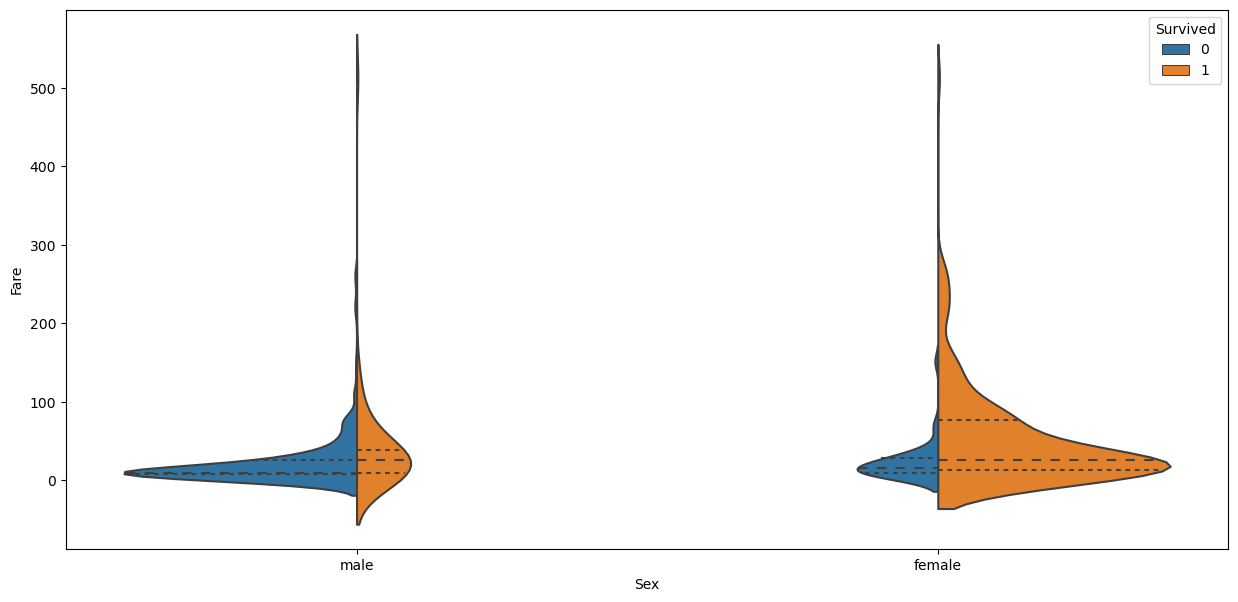

In [22]:
plt.figure(figsize=(15,7))
sns.violinplot(x="Sex", y="Fare", hue="Survived", data=df, split=True, scale="count", inner="quartile")
plt.show()


The adition of fare column displays that the men who paid the least fare were not allowed to get on the life boats causing them to drown indicating that low priced fare meant a lower class passenger and hence a lower priority over rescuing.

### Fixing and Filling the missing values

In [23]:
# chacking null values.

df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Gettig back to the missing values issue we will need to fix it and I have decided on using the mean option for "Age" column and mode for the "Embarked" column.

<Axes: xlabel='Pclass', ylabel='Age'>

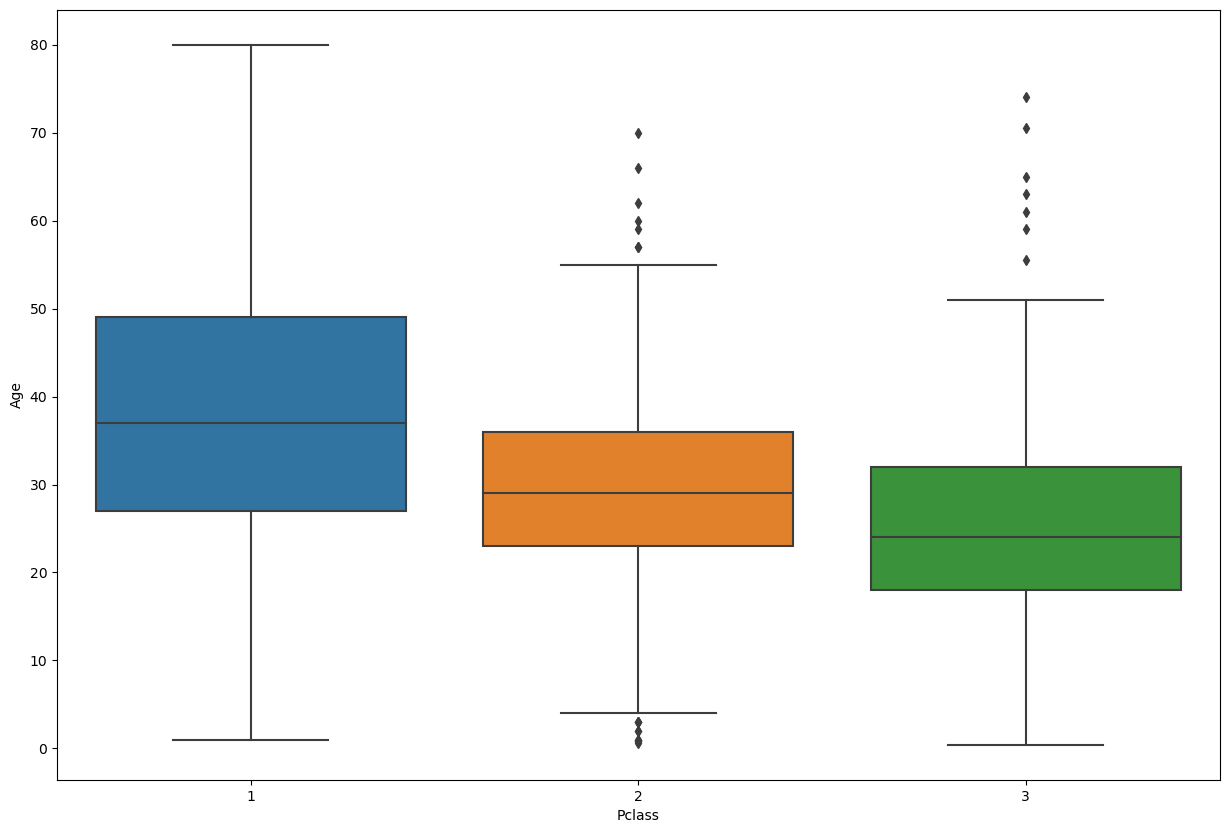

In [24]:
# Box Plot

plt.figure(figsize=(15,10))
sns.boxplot(x='Pclass', y='Age', data=df)

For filling the missing value in the age column I am checking the average age of a person in that particular class so that we do not just randomly fill in those years for the age column.

In the above boxplot it shows that the class 1 people who are wealthy are above the average age for the other 2 class and in the class 3 there were mostly youngsters who did not have hefty money at that age.

In [25]:
def fill_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

So we have created a function after applying the observations from the boxplot to get the average age based on the class of travel. In class 1 we see average age as 37, for class 2 the average age is around 29 and class 3 has an approximate avergae age of 24.

We will now use this function to fill the missing age values.

In [26]:
# Missing value Fill Age and Pclass

df["Age"] = df[["Age","Pclass"]].apply(fill_age, axis=1)

Using our fill_age function we have now added the average years data into the age column of our data set.

In [27]:
# Missing value Fill Embarked column.

df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

We have used the mode option to fill the missing data in Embarked column with the value most common for the column row wise.

In [28]:
# Encoding

df = pd.get_dummies(df)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,24.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


I am using the pandas get_dummies method to encode the categorical object datatype 'Sex' and 'Embarked' columns. Since get_dummies uses the One Hot Encoding mechanism we are able to get extra columns where the rows are converted to indicator variables.

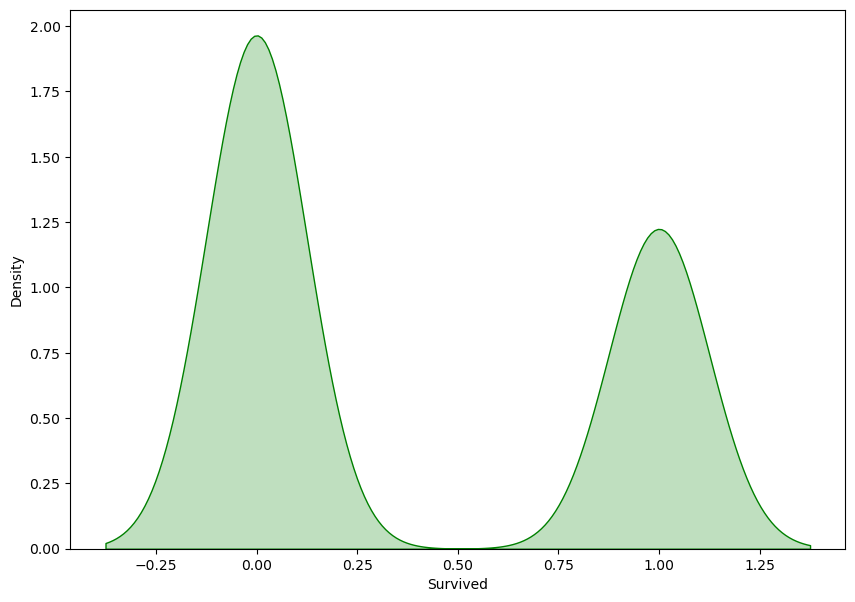

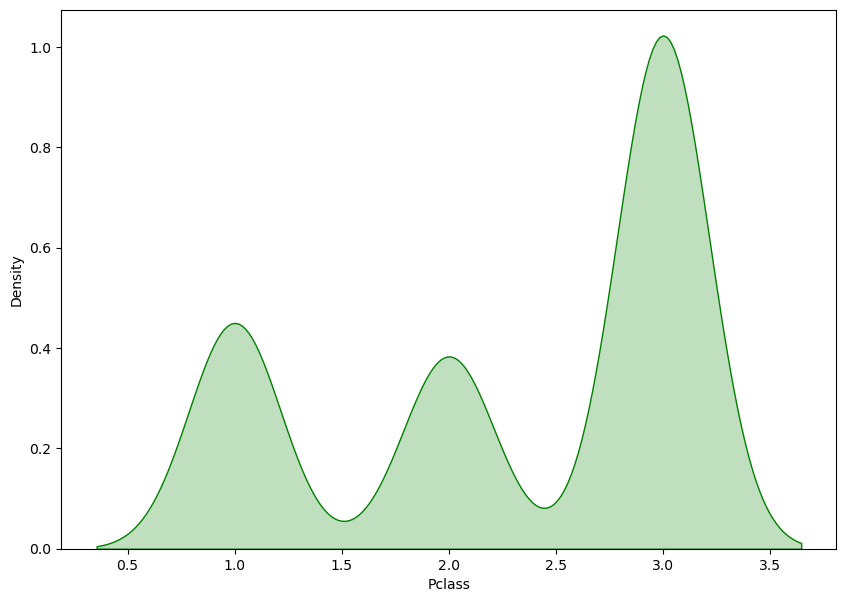

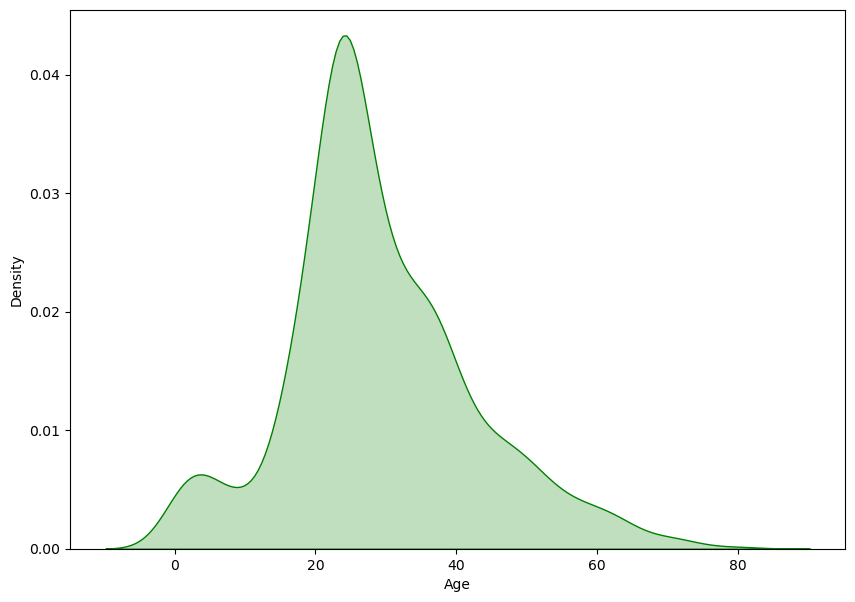

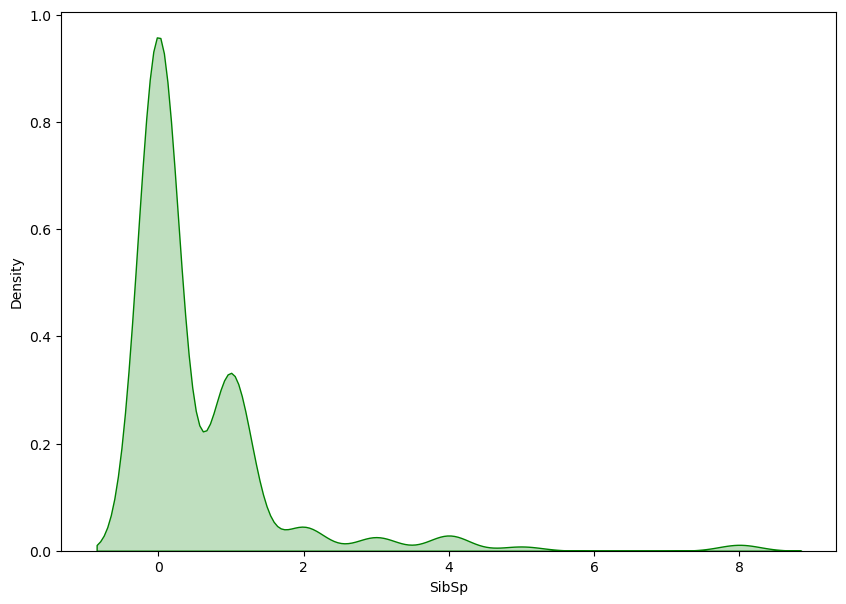

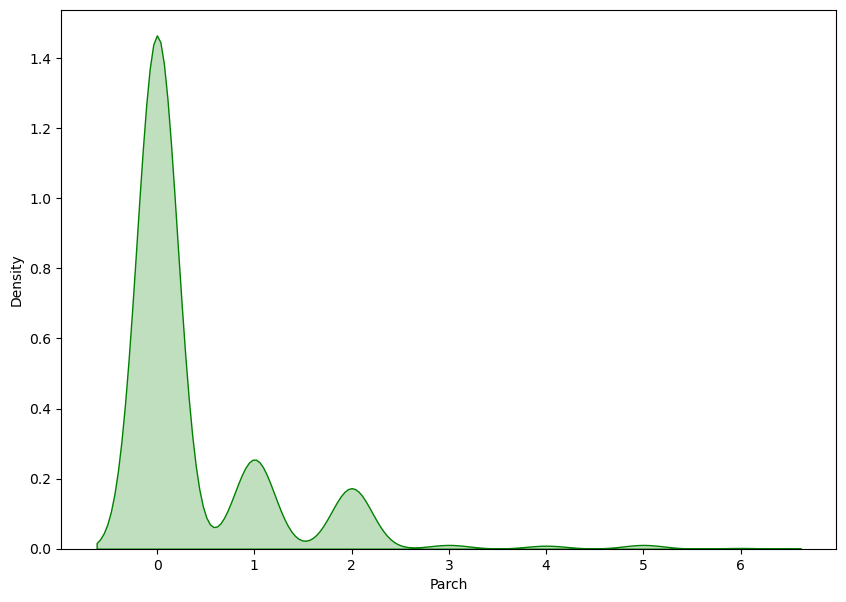

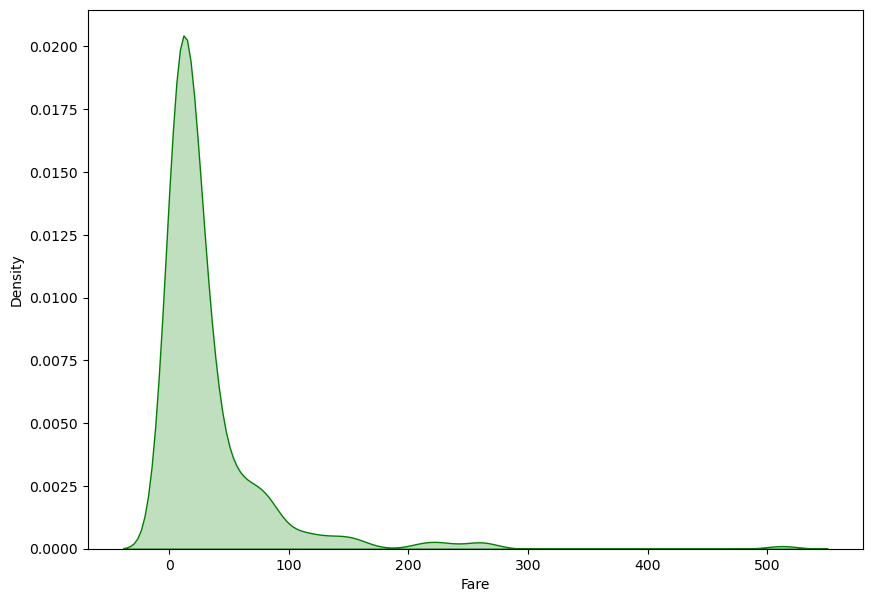

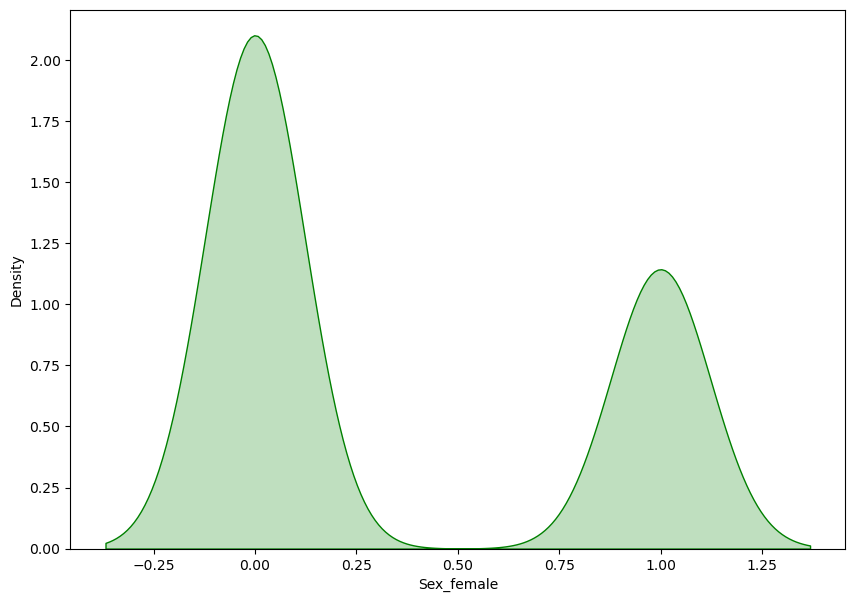

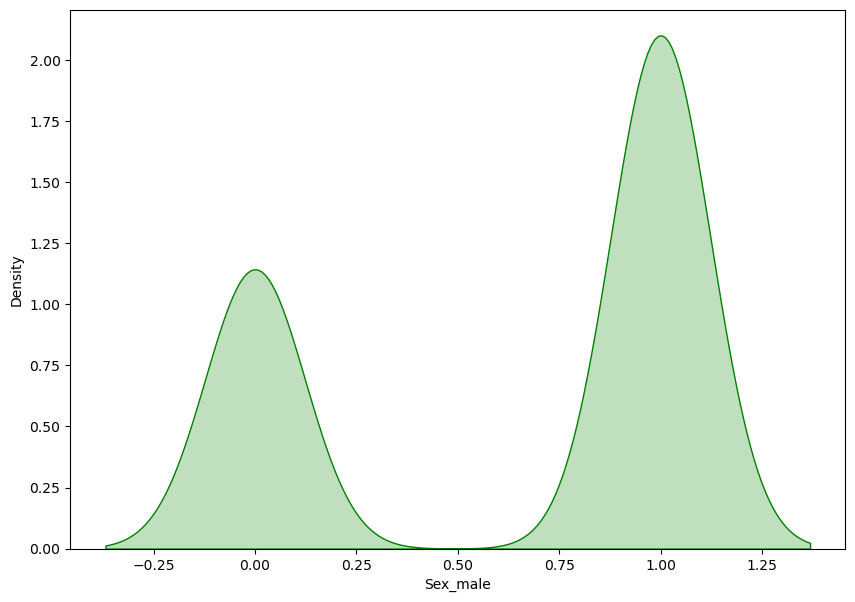

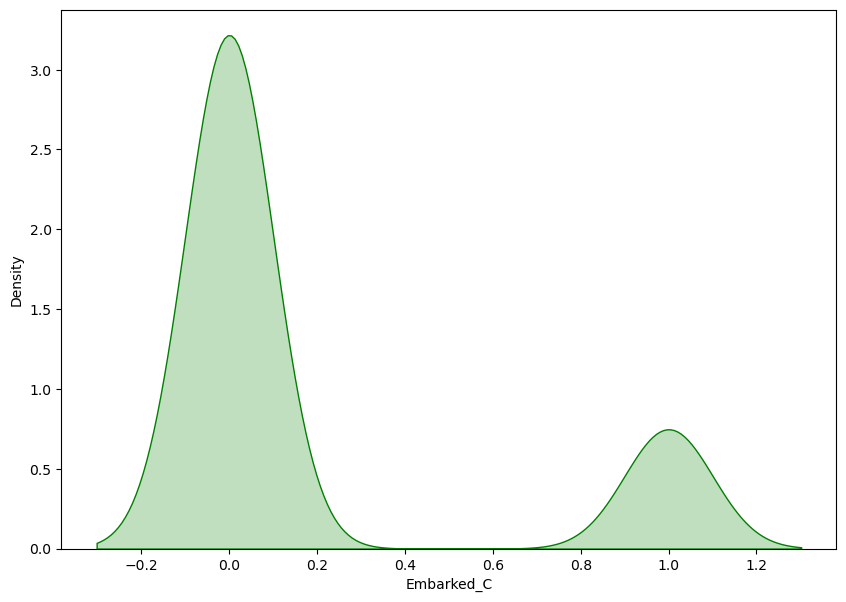

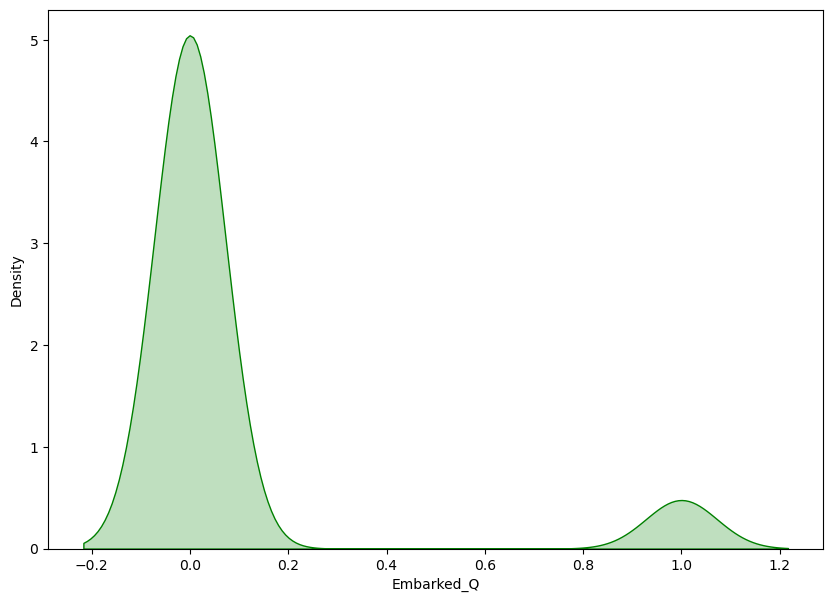

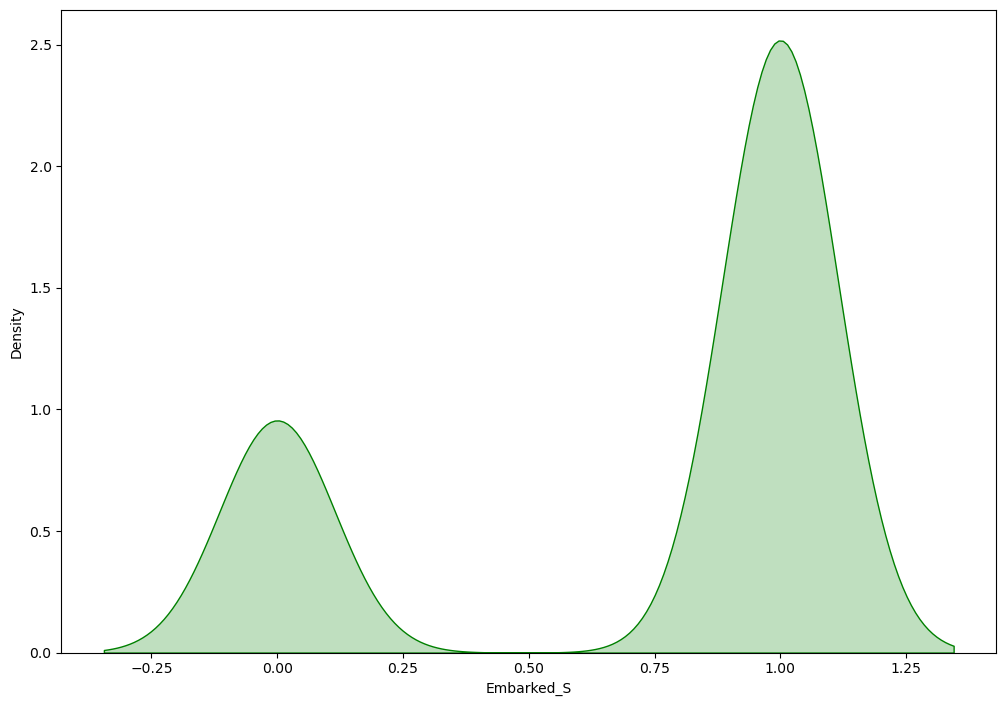

In [29]:
# Distribution Plot

for col, value in df.items():
    plt.figure(figsize=(10,7))
    sns.distplot(value, hist=False, color="g", kde_kws={"shade": True})
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

Looking at the distribution plot after applying the encoding technique and ensuring all object datatype are converted to numbers that can be used for visualization we see that the presence of outliers are affecting the distribution patterns and causing skewness that might need to be treated.

But first I will try to build a model retaining all the data and check whether the model accuracy gets affected due to it or not.

In [30]:
# Correlation

df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.047255,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.168240,0.003650,-0.149683
Pclass,-0.338481,1.000000,-0.408487,0.083081,0.018443,-0.549500,-0.131900,0.131900,-0.243292,0.221009,0.074053
Age,-0.047255,-0.408487,1.000000,-0.243526,-0.171095,0.123784,-0.078421,0.078421,0.040700,-0.081658,0.015733
SibSp,-0.035322,0.083081,-0.243526,1.000000,0.414838,0.159651,0.114631,-0.114631,-0.059528,-0.026354,0.068734
Parch,0.081629,0.018443,-0.171095,0.414838,1.000000,0.216225,0.245489,-0.245489,-0.011069,-0.081228,0.060814
Fare,0.257307,-0.549500,0.123784,0.159651,0.216225,1.000000,0.182333,-0.182333,0.269335,-0.117216,-0.162184
Sex_female,0.543351,-0.131900,-0.078421,0.114631,0.245489,0.182333,1.000000,-1.000000,0.082853,0.074115,-0.119224
Sex_male,-0.543351,0.131900,0.078421,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,-0.082853,-0.074115,0.119224
Embarked_C,0.168240,-0.243292,0.040700,-0.059528,-0.011069,0.269335,0.082853,-0.082853,1.000000,-0.148258,-0.782742
Embarked_Q,0.003650,0.221009,-0.081658,-0.026354,-0.081228,-0.117216,0.074115,-0.074115,-0.148258,1.000000,-0.499421


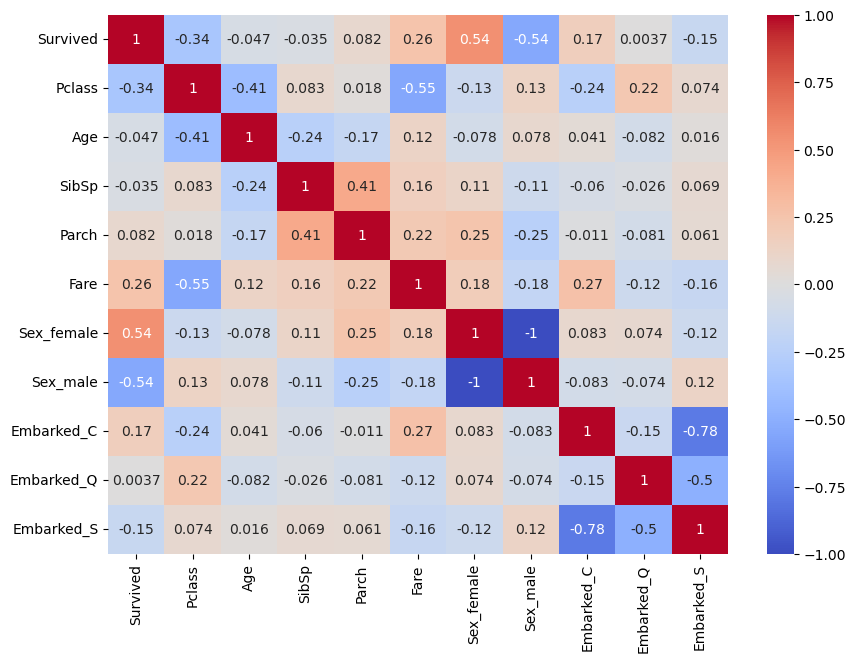

In [31]:
# Correlation using a Heatmap

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

In the above correlation heatmap we can see that our label has both positive and negative correlation with the other columns present in our dataset.

The female column is a perfect negative correlation to male column since the higher the number of female survivors the lower the number of male survivors.

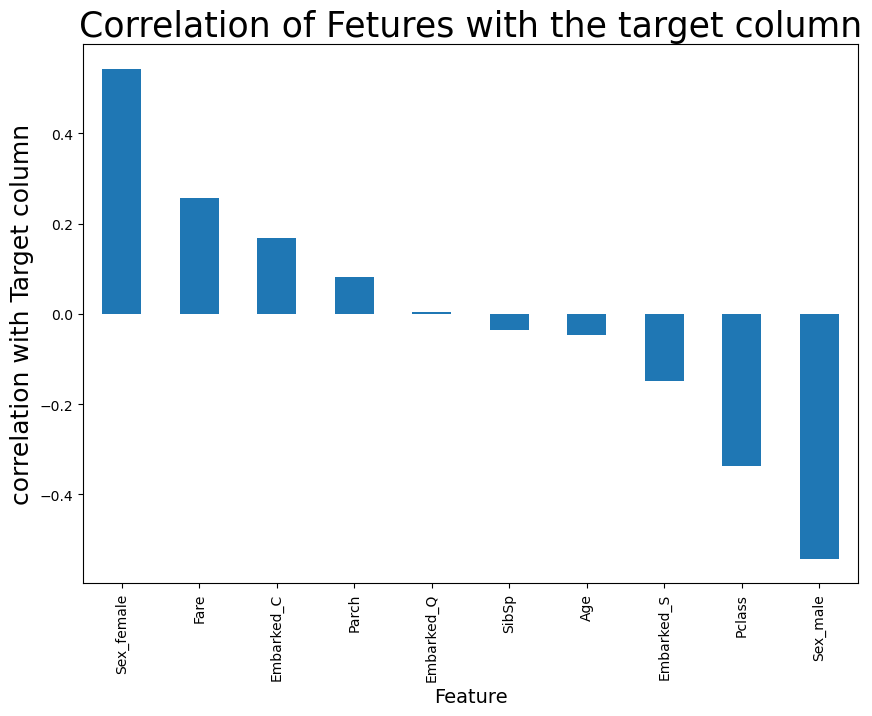

In [32]:
plt.figure(figsize=(10,7))
df.corr()["Survived"].sort_values(ascending=False).drop(["Survived"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()

### Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [33]:
# Splitting data in target and dependent feature

X = df.drop("Survived", axis=1)
Y = df["Survived"]

separated the dataset into features and labels where X represents all the feature columns and Y represents the target label column.

In [34]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [35]:
X                             # Displaying all the features after applying scaling technique to avoid bias output

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.827377,-0.533834,0.432793,-0.473674,-0.502445,-0.737695,0.737695,-0.482043,-0.307562,0.615838
1,-1.566107,0.674891,0.432793,-0.473674,0.786845,1.355574,-1.355574,2.074505,-0.307562,-1.623803
2,0.827377,-0.231653,-0.474545,-0.473674,-0.488854,1.355574,-1.355574,-0.482043,-0.307562,0.615838
3,-1.566107,0.448255,0.432793,-0.473674,0.420730,1.355574,-1.355574,-0.482043,-0.307562,0.615838
4,0.827377,0.448255,-0.474545,-0.473674,-0.486337,-0.737695,0.737695,-0.482043,-0.307562,0.615838
...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.156107,-0.474545,-0.473674,-0.386671,-0.737695,0.737695,-0.482043,-0.307562,0.615838
887,-1.566107,-0.760469,-0.474545,-0.473674,-0.044381,1.355574,-1.355574,-0.482043,-0.307562,0.615838
888,0.827377,-0.382743,0.432793,2.008933,-0.176263,1.355574,-1.355574,-0.482043,-0.307562,0.615838
889,-1.566107,-0.231653,-0.474545,-0.473674,-0.044381,-0.737695,0.737695,2.074505,-0.307562,-1.623803


Even though all our feature columns were of numeric data type I was unhappy with the decimal place differences and was worried that it might make my model biased towards float and integers. Therefore I am using the Standard Scaler method to ensure all my feature columns have been standardized.

In [36]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,891.000000,8.910000e+02
mean,-8.772133e-17,2.193033e-16,4.386066e-17,5.382900e-17,3.987333e-18,3.987333e-17,-1.156327e-16,-1.993666e-17,0.000000,-8.373399e-17
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562,1.000562e+00
min,-1.566107e+00,-2.164100e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01,-7.376951e-01,-1.355574e+00,-4.820427e-01,-0.307562,-1.623803e+00
25%,-3.693648e-01,-5.338337e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01,-7.376951e-01,-1.355574e+00,-4.820427e-01,-0.307562,-1.623803e+00
50%,8.273772e-01,-2.316526e-01,-4.745452e-01,-4.736736e-01,-3.573909e-01,-7.376951e-01,7.376951e-01,-4.820427e-01,-0.307562,6.158384e-01
75%,8.273772e-01,5.993453e-01,4.327934e-01,-4.736736e-01,-2.424635e-02,1.355574e+00,7.376951e-01,-4.820427e-01,-0.307562,6.158384e-01
max,8.273772e-01,3.847792e+00,6.784163e+00,6.974147e+00,9.667167e+00,1.355574e+00,7.376951e-01,2.074505e+00,3.251373,6.158384e-01


Using the describe method I can see the count, mean, standard deviation, minimum, maximum and inter quantile values of our feature data set.

In [37]:
X = X.drop(["SibSp","Parch","Embarked_C","Embarked_Q","Embarked_S"], axis=1)

In [38]:
X

,Pclass,Age,Fare,Sex_female,Sex_male
0,0.827377,-0.533834,-0.502445,-0.737695,0.737695
1,-1.566107,0.674891,0.786845,1.355574,-1.355574
2,0.827377,-0.231653,-0.488854,1.355574,-1.355574
3,-1.566107,0.448255,0.420730,1.355574,-1.355574
4,0.827377,0.448255,-0.486337,-0.737695,0.737695
...,...,...,...,...,...
886,-0.369365,-0.156107,-0.386671,-0.737695,0.737695
887,-1.566107,-0.760469,-0.044381,1.355574,-1.355574
888,0.827377,-0.382743,-0.176263,1.355574,-1.355574
889,-1.566107,-0.231653,-0.044381,-0.737695,0.737695


I have dropped the SibSp, Parch, Embarked_C, Embarked_Q and Embarked_S columns from the features list to check if that improves the accuracy for our classification models since as per the correlation details we saw it did not have much input for any kind of corresponse with the survival rate.

When I built the model using these columns the model score were lower than the one's when we dropped them.

In [41]:
# Creating the training and testing data sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

### ML Model Function for Classification and Evaluation Metrics

In [40]:
# Importing Machine learning Model library

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [42]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

 have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any classification machine learning model that calls for this function.

Note: I have not removed the outliers since the loss of those data gave a lower score on the classification model when compared to retaining the outliers. Also the usage of Z score and IQR methods gave a data loss of more than 15 percent which I could not afford on my current data set.

In [43]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 79.3296089385475

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Cross Validation Score: 79.46142740568703

Accuracy Score - Cross Validation Score is -0.1318184671395386


In [44]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 81.56424581005587

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179

Cross Validation Score: 80.02573598644153

Accuracy Score - Cross Validation Score is 1.5385098236143335


In [45]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 82.68156424581005

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

Cross Validation Score: 79.35408951101626

Accuracy Score - Cross Validation Score is 3.327474734793796


In [46]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 84.91620111731844

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88       105
           1       0.85      0.77      0.81        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179

Cross Validation Score: 81.26043562864854

Accuracy Score - Cross Validation Score is 3.6557654886699


In [47]:
# K N Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 80.44692737430168

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.84       105
           1       0.82      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.80      0.80       179

Cross Validation Score: 80.69298851296216

Accuracy Score - Cross Validation Score is -0.24606113866047963


In [48]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 84.35754189944134

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       105
           1       0.84      0.77      0.80        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179

Cross Validation Score: 79.23984683949531

Accuracy Score - Cross Validation Score is 5.11769505994603


### Hyper parameter tuning on the best ML Model

In [49]:
# Choosing Support Vector Classifier

svc_param = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [21, 42, 104],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr']
            }

After comparing all the classification models I have selected Support Vector Classifier as my best model and have listed down it's parameters above referring the sklearn webpage.

In [50]:
GSCV = GridSearchCV(SVC(), svc_param, cv=5)

I am using the Grid Search CV method for hyper parameter tuning my best model.

In [51]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False]})

I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes.

In [52]:
GSCV.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'poly',
 'probability': True,
 'random_state': 21,
 'shrinking': True}

Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model.

In [53]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='poly', probability=True, random_state=21,
                 shrinking=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 80.44692737430168


I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the accuracy score for it.

In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc

In [55]:
# predict probabilities for test set
y_pred_prob = model.predict_proba(X_test)[:, 1]


In [56]:
# calculate FPR, TPR, and thresholds

fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

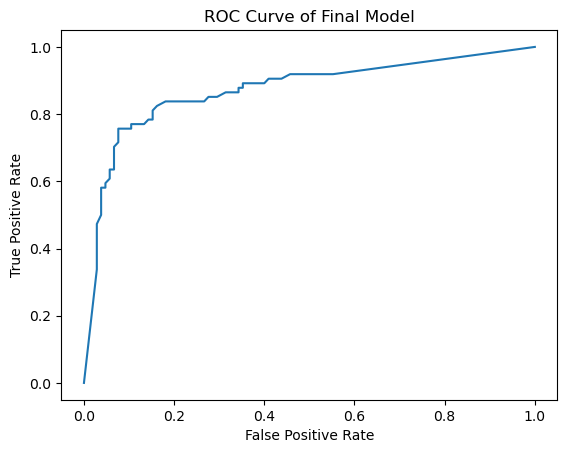

Auc_Score: 0.8723938223938223


In [59]:
# plot ROC curve

plt.plot(fpr, tpr)
plt.title("ROC Curve of Final Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# calculate AUC

auc_value = auc(fpr, tpr)
print("Auc_Score:" ,auc_value)

Generated the ROC Curve for my final model and it shows the AUC score for my final model to be of 87%

### confusion matrix for  FinalModel

In [60]:
# fit decision tree classifier

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [61]:
# predict labels for test set
y_pred = model.predict(X_test)


In [63]:
# calculate confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred)

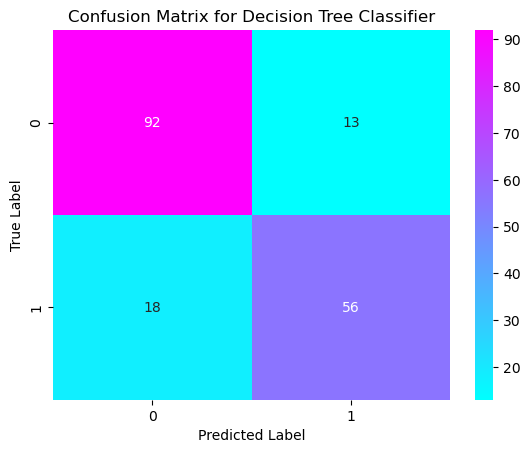

In [66]:
# plot confusion matrix using seaborn heatmap

sns.heatmap(cm, annot=True, fmt="d", cmap="cool")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Saving model

In [67]:
import joblib
joblib.dump(Final_Model,'Titanic_survived_Final.pkl')

['Titanic_survived_Final.pkl']